In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split


from sklearn.metrics import r2_score


In [2]:
dataset = pd.read_excel(r"All Opp 29-10-2024 12-36-19.xlsx")
dataset.drop(["(Do Not Modify) Row Checksum","(Do Not Modify) Opportunity", "Topic","Potential Customer","Created By",],axis=1, inplace=True)
dataset.head(5)


c:\anaconda\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,(Do Not Modify) Modified On,Est. Revenue,Status Reason,Created On,Status,Total Amount (Base),Total Setup Fee (Base),Est. Revenue (Base),Actual License Fee (Base)
0,2024-10-01 08:24:06,780.0,Won,2023-12-30 21:53:15,Won,780.00,0.0,780.00,780.00
1,2024-10-01 08:24:06,425.0,Won,2023-12-29 23:16:42,Won,425.00,0.0,425.00,425.00
2,2024-10-01 08:24:05,510.0,Won,2023-12-29 23:08:09,Won,510.00,0.0,510.00,510.00
3,2024-09-04 11:54:05,11900.0,Won,2023-12-29 21:07:38,Won,1029.04,0.0,1029.04,1029.04
4,2024-10-03 12:19:18,11900.0,Won,2023-12-29 20:59:09,Won,1029.04,0.0,1029.04,1029.04


In [3]:
dataset.isnull().sum()

(Do Not Modify) Modified On       0
Est. Revenue                     16
Status Reason                     0
Created On                        0
Status                            0
Total Amount (Base)               0
Total Setup Fee (Base)         1061
Est. Revenue (Base)              16
Actual License Fee (Base)         0
dtype: int64

In [4]:
# Ensure 'Created On' is in datetime format (if not already)
dataset['Created On'] = pd.to_datetime(dataset['Created On'])

# Drop all records created in 2024
dataset = dataset[dataset['Created On'].dt.year != 2024]

# Example of elapsed days since a reference date
reference_date = pd.Timestamp('2022-01-01')
dataset['Days_Since_Reference'] = (dataset['Created On'] - reference_date).dt.days

# Continue with your existing code for processing the data and making predictions
# ...

# For example, you can now verify the remaining years
print("Remaining dataset after removing 2024 data:")
print(dataset.head(3))


Remaining dataset after removing 2024 data:
  (Do Not Modify) Modified On  Est. Revenue Status Reason          Created On  \
0         2024-10-01 08:24:06         780.0           Won 2023-12-30 21:53:15   
1         2024-10-01 08:24:06         425.0           Won 2023-12-29 23:16:42   
2         2024-10-01 08:24:05         510.0           Won 2023-12-29 23:08:09   

  Status  Total Amount (Base)  Total Setup Fee (Base)  Est. Revenue (Base)  \
0    Won                780.0                     0.0                780.0   
1    Won                425.0                     0.0                425.0   
2    Won                510.0                     0.0                510.0   

   Actual License Fee (Base)  Days_Since_Reference  
0                      780.0                   728  
1                      425.0                   727  
2                      510.0                   727  


In [5]:
status_dummies = pd.get_dummies(dataset['Status'], prefix='Status', drop_first=False)
dataset = pd.concat([dataset, status_dummies], axis=1)
dataset[status_dummies.columns] = dataset[status_dummies.columns].astype(int)

In [6]:
dataset.head(3)

,(Do Not Modify) Modified On,Est. Revenue,Status Reason,Created On,Status,Total Amount (Base),Total Setup Fee (Base),Est. Revenue (Base),Actual License Fee (Base),Days_Since_Reference,Status_Lost,Status_Open,Status_Won
0,2024-10-01 08:24:06,780.0,Won,2023-12-30 21:53:15,Won,780.0,0.0,780.0,780.0,728,0,0,1
1,2024-10-01 08:24:06,425.0,Won,2023-12-29 23:16:42,Won,425.0,0.0,425.0,425.0,727,0,0,1
2,2024-10-01 08:24:05,510.0,Won,2023-12-29 23:08:09,Won,510.0,0.0,510.0,510.0,727,0,0,1


In [7]:
print(dataset.columns)


Index(['(Do Not Modify) Modified On', 'Est. Revenue', 'Status Reason',
       'Created On', 'Status', 'Total Amount (Base)', 'Total Setup Fee (Base)',
       'Est. Revenue (Base)', 'Actual License Fee (Base)',
       'Days_Since_Reference', 'Status_Lost', 'Status_Open', 'Status_Won'],
      dtype='object')


In [8]:
# Convert the 'Created On' column to datetime
dataset['Created On'] = pd.to_datetime(dataset['Created On'])

# Extract the year into a new column
dataset['Year'] = dataset['Created On'].dt.year
# Filter for opportunities with Status "Won"
won_opportunities = dataset[dataset['Status'] == 'Won']

total_amount_won_per_year = won_opportunities.groupby('Year')['Total Amount (Base)'].sum()

print(total_amount_won_per_year)

Year
2022    18548355.17
2023    21432594.35
Name: Total Amount (Base), dtype: float64


In [9]:


# Assuming dataset has already been loaded and processed.
# Filter the dataset for opportunities with Status "Won"
won_opportunities = dataset[dataset['Status'] == 'Won']

# Group by 'Year', calculate the sum and count of 'Total Amount', and then compute the average manually
total_amount_sum_won = won_opportunities.groupby('Year')['Total Amount (Base)'].sum()
total_amount_count_won = won_opportunities.groupby('Year')['Total Amount (Base)'].count()

# Calculate the average using the sum/count formula
average_cost_per_year_won = total_amount_sum_won / total_amount_count_won

# Display the result for opportunities won for each year
print("Average Cost Per Year for Opportunities Won:")
print(average_cost_per_year_won)

# Create dynamic variables for each year's data related to won opportunities
yearly_data_won = {}
for year in average_cost_per_year_won.index:
    yearly_data_won[f'total_amount_won_{year}'] = total_amount_sum_won[year]
    yearly_data_won[f'number_of_opportunities_won_{year}'] = total_amount_count_won[year]
    yearly_data_won[f'average_cost_won_{year}'] = average_cost_per_year_won[year]

# Example: Accessing the data for each year
for key, value in yearly_data_won.items():
    print(f"{key}: {value}")

# Now you can access any year’s won opportunities data dynamically using:
# yearly_data_won['total_amount_won_2022'], yearly_data_won['number_of_opportunities_won_2022'], etc.



Average Cost Per Year for Opportunities Won:
Year
2022    6393.779790
2023    3930.422584
Name: Total Amount (Base), dtype: float64
total_amount_won_2022: 18548355.17
number_of_opportunities_won_2022: 2901
average_cost_won_2022: 6393.7797897276805
total_amount_won_2023: 21432594.35
number_of_opportunities_won_2023: 5453
average_cost_won_2023: 3930.422583898772


In [10]:
# # Assuming dataset has already been loaded and processed.
# # Filter the dataset for opportunities with Status "Won"
# won_opportunities = dataset[dataset['Status'] == 'Won']

# # Group by 'Year', calculate the sum and count of 'Total Amount', and then compute the average manually
# total_amount_sum_won = won_opportunities.groupby('Year')['Total Amount (Base)'].sum()
# total_amount_count_won = won_opportunities.groupby('Year')['Total Amount (Base)'].count()

# # Calculate the average using the sum/count formula
# average_cost_per_year_won = total_amount_sum_won / total_amount_count_won

# # Display the result for opportunities won for each year
# print("Average Cost Per Year for Opportunities Won:")
# print(average_cost_per_year_won)

# # Create dynamic variables for each year's data related to won opportunities
# yearly_data_won = {}
# for year in average_cost_per_year_won.index:
#     yearly_data_won[f'total_amount_won_{year}'] = total_amount_sum_won[year]
#     yearly_data_won[f'number_of_opportunities_won_{year}'] = total_amount_count_won[year]
#     yearly_data_won[f'average_cost_won_{year}'] = average_cost_per_year_won[year]

# # Predicting for 2024
# # Calculate average growth rate based on previous years
# if len(average_cost_per_year_won) >= 2:
#     growth_rate_total = (total_amount_sum_won.iloc[-1] - total_amount_sum_won.iloc[-2]) / total_amount_sum_won.iloc[-2]
#     growth_rate_count = (total_amount_count_won.iloc[-1] - total_amount_count_won.iloc[-2]) / total_amount_count_won.iloc[-2]
    
#     # Use the last year's total and count to predict 2024 values
#     predicted_total_amount_2024 = total_amount_sum_won.iloc[-1] * (1 + growth_rate_total)
#     predicted_count_2024 = total_amount_count_won.iloc[-1] * (1 + growth_rate_count)
#     predicted_average_cost_2024 = predicted_total_amount_2024 / predicted_count_2024

#     # Store predictions for 2024 in the dynamic variables
#     yearly_data_won['total_amount_won_2024'] = predicted_total_amount_2024
#     yearly_data_won['number_of_opportunities_won_2024'] = predicted_count_2024
#     yearly_data_won['average_cost_won_2024'] = predicted_average_cost_2024
# else:
#     print("Not enough data to predict 2024.")

# # Example: Accessing the data for each year
# for key, value in yearly_data_won.items():
#     print(f"{key}: {value}")

# # Now you can access any year’s won opportunities data dynamically including 2024:
# # yearly_data_won['total_amount_won_2024'], yearly_data_won['number_of_opportunities_won_2024'], etc.


In [11]:
data = {
    'Year': average_cost_per_year_won.index,
    'Total Amount (Won)': total_amount_sum_won.values,
    'Number of Opportunities (Won)': total_amount_count_won.values
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print("\nDataFrame with Won Opportunities:")
print(df)


DataFrame with Won Opportunities:
   Year  Total Amount (Won)  Number of Opportunities (Won)
0  2022         18548355.17                           2901
1  2023         21432594.35                           5453


In [12]:
df['Average Cost Won'] = average_cost_per_year_won.values

In [13]:
# Prepare the data for linear regression

X = df[['Year']]
X2 =df[['Year','Average Cost Won']]
y_total = df['Total Amount (Won)']
y_count = df['Number of Opportunities (Won)']


In [14]:
X_train, X_test, y_train_total, y_test_total = train_test_split(X, y_total, test_size=0.2, random_state=42)
X2_train, X2_test, y_train_count, y_test_count = train_test_split(X2, y_count, test_size=0.2, random_state=42)

In [15]:
# Create and fit the model for Total Amount
model_total = LinearRegression()
model_total.fit(X, y_total)


LinearRegression()

In [16]:
# Create and fit the model for Number of Opportunities
model_count = LinearRegression()
model_count.fit(X2, y_count)


LinearRegression()

In [17]:
# Calculate R² score for both models
r2_total = r2_score(y_total, model_total.predict(X))
r2_count = r2_score(y_count, model_count.predict(X2))

In [18]:
# Estimate the 'Average Cost Won' for 2024, using the mean of past years' values
average_cost_won_estimate = df['Average Cost Won'].mean()

# Update year_to_predict to include both Year and the estimated 'Average Cost Won'
year_to_predict = np.array([[2024, average_cost_won_estimate]])
#year_to_predict2 = np.array([[2024]])

# Predict using the model
predicted_total_amount = model_total.predict([[2024]])[0]
predicted_number_of_opportunities = model_count.predict(year_to_predict)[0]

# Display the predictions
print(f"Predicted Total Amount (Won) for 2024: {predicted_total_amount:.2f}")
print(f"Predicted Number of Opportunities (Won) for 2024: {predicted_number_of_opportunities:.0f}")


Predicted Total Amount (Won) for 2024: 24316833.53
Predicted Number of Opportunities (Won) for 2024: 4177


c:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:

# Display the predictions and R² scores
print(f"Predicted Total Amount (Won) for 2024: {predicted_total_amount:.2f}")
print(f"Predicted Number of Opportunities (Won) for 2024: {predicted_number_of_opportunities:.0f}")
print(f"R² Score for Total Amount Model: {r2_total:.4f}")
print(f"R² Score for Number of Opportunities Model: {r2_count:.4f}")

Predicted Total Amount (Won) for 2024: 24316833.53
Predicted Number of Opportunities (Won) for 2024: 4177
R² Score for Total Amount Model: 1.0000
R² Score for Number of Opportunities Model: 1.0000


In [20]:
average_opportunity_total_cost_2024 = predicted_total_amount/predicted_number_of_opportunities
print(f"Predicted average cost og opportunity in 2024 = {average_opportunity_total_cost_2024:.0f}")

Predicted average cost og opportunity in 2024 = 5822


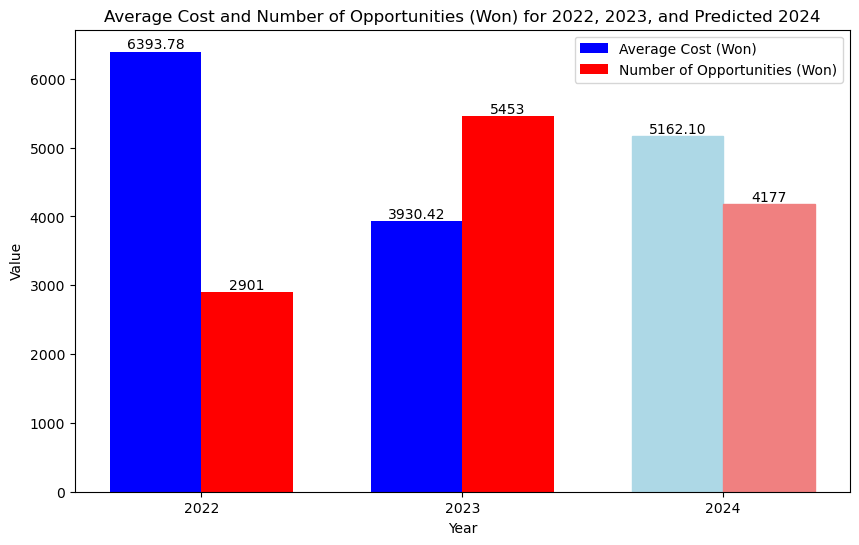

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the years
years = [2022, 2023, 2024]
average_costs = [df.loc[df['Year'] == 2022, 'Average Cost Won'].values[0],
                 df.loc[df['Year'] == 2023, 'Average Cost Won'].values[0],
                 average_cost_won_estimate]  # Estimated average cost for 2024
number_of_opportunities = [df.loc[df['Year'] == 2022, 'Number of Opportunities (Won)'].values[0],
                           df.loc[df['Year'] == 2023, 'Number of Opportunities (Won)'].values[0],
                           predicted_number_of_opportunities]

# Create a bar width and position for the grouped bars
bar_width = 0.35
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar for Average Cost
bars1 = ax1.bar(r1, average_costs, color='blue', width=bar_width, label='Average Cost (Won)')
# Bar for Number of Opportunities
bars2 = ax1.bar(r2, number_of_opportunities, color='red', width=bar_width, label='Number of Opportunities (Won)')

# Highlight the predicted values for 2024
bars1[2].set_color('lightblue')  # Change the color for predicted Average Cost
bars2[2].set_color('lightcoral')  # Change the color for predicted Number of Opportunities

# Labeling
ax1.set_xlabel('Year')
ax1.set_title('Average Cost and Number of Opportunities (Won) for 2022, 2023, and Predicted 2024')
ax1.set_xticks([r + bar_width / 2 for r in range(len(years))])
ax1.set_xticklabels(years)
ax1.set_ylabel('Value')

# Adding legend
plt.legend()

# Displaying values on bars
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom')

# Display the plot

plt.show()


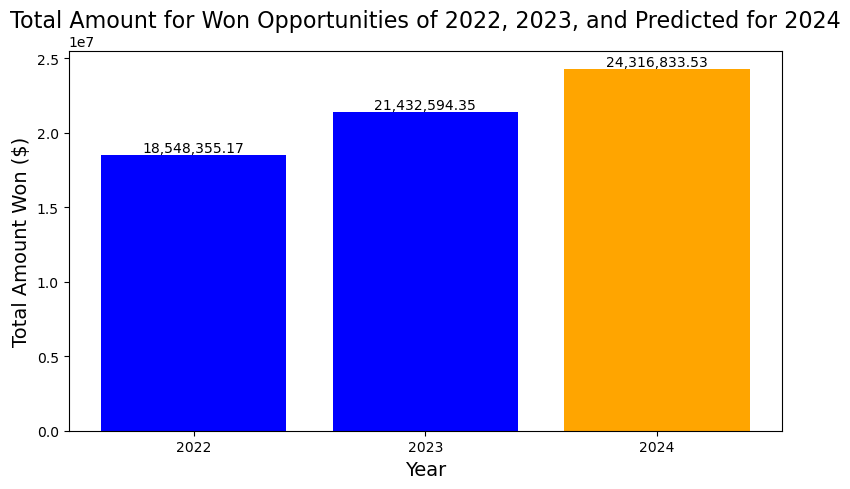

In [22]:
import matplotlib.pyplot as plt

# Data for plotting using variables
years = ['2022', '2023', '2024']
total_amounts = [
    total_amount_sum_won[2022],   # Total amount for 2022
    total_amount_sum_won[2023],   # Total amount for 2023
    predicted_total_amount         # Predicted total amount for 2024
]

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 5))  # Assign the figure to `fig`
bars = ax.bar(years, total_amounts, color=['blue', 'blue', 'orange'])

# Adding title and labels
ax.set_title('Total Amount for Won Opportunities of 2022, 2023, and Predicted for 2024', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Total Amount Won ($)', fontsize=14)

# Adding data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.2f}', ha='center', va='bottom')



# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Save the figure as a file
fig.savefig("predicted_graph2.png")  # Use `fig` to save the graph
plt.show()  # Display the plot


In [23]:
# After your calculations and predictions
years = [2022, 2023, 2024]  # Define the years of interest

# Create a dictionary to hold the average cost and number of opportunities for each year
yearly_statistics = {}

# Store values for each year
for year in years:
    if year in average_cost_per_year_won.index:
        yearly_statistics[year] = {
            'Average Cost Won': average_cost_per_year_won[year],
            'Number of Opportunities Won': total_amount_count_won[year]
        }
    else:
        # For 2024, use the predicted values
        yearly_statistics[year] = {
            'Average Cost Won': average_cost_won_estimate,  # Estimated average cost for 2024
            'Number of Opportunities Won': predicted_number_of_opportunities
        }

# Display the results
for year, stats in yearly_statistics.items():
    print(f"{year}: Average Cost Won = {stats['Average Cost Won']:.2f}, Number of Opportunities Won = {stats['Number of Opportunities Won']:.0f}")


2022: Average Cost Won = 6393.78, Number of Opportunities Won = 2901
2023: Average Cost Won = 3930.42, Number of Opportunities Won = 5453
2024: Average Cost Won = 5162.10, Number of Opportunities Won = 4177


# 2025 Prediction


In [24]:
# Assume you have already predicted the following for 2024
predicted_total_amount_2024 = predicted_total_amount  # Example predicted total amount for 2024
predicted_number_of_opportunities_2024 = predicted_number_of_opportunities  # Example predicted number of opportunities for 2024
predicted_average_cost_2024 = predicted_total_amount_2024 / predicted_number_of_opportunities_2024  # Calculate average cost

In [25]:
# Define additional years for prediction
additional_years = [2025]
data_extended = {
    'Year': list(df['Year']) + [2024] + additional_years,  # Add 2024 before additional years
    'Total Amount (Won)': list(df['Total Amount (Won)']) + [predicted_total_amount_2024] + [None],  # Add prediction for 2024
    'Number of Opportunities (Won)': list(df['Number of Opportunities (Won)']) + [predicted_number_of_opportunities_2024] + [None],  # Add prediction for 2024
    'Average Cost Won': list(df['Average Cost Won']) + [predicted_average_cost_2024] + [None]  # Add prediction for 2024
}

In [26]:
# Create a new DataFrame for the extended years
df_extended = pd.DataFrame(data_extended)

# Fit the models again with the extended data
# Prepare X for both models
X_extended = df_extended[['Year']]
X2_extended = df_extended[['Year', 'Average Cost Won']]

In [27]:

# Fit the model for Total Amount
model_total_extended = LinearRegression()
model_total_extended.fit(X_extended[:-1], df_extended['Total Amount (Won)'][:-1].fillna(0))  # Exclude the last row for fitting


LinearRegression()

In [28]:
# Fit the model for Number of Opportunities
model_count_extended = LinearRegression()
model_count_extended.fit(X2_extended[:-1].fillna(0), df_extended['Number of Opportunities (Won)'][:-1].fillna(0))  # Exclude the last row for fitting


LinearRegression()

In [29]:
# Predicting for 2025
year_to_predict_2025 = np.array([[2025]])
average_cost_won_estimate_2025 = df['Average Cost Won'].mean()  # You can also use a different method for estimation

# Predicting Total Amount and Number of Opportunities for 2025
predicted_total_amount_2025 = model_total_extended.predict(year_to_predict_2025)[0]
predicted_number_of_opportunities_2025 = model_count_extended.predict(np.array([[2025, average_cost_won_estimate_2025]]))[0]

# Display the predictions for 2025
print(f"Predicted Total Amount (Won) for 2025: {predicted_total_amount_2025:.2f}")
print(f"Predicted Number of Opportunities (Won) for 2025: {predicted_number_of_opportunities_2025:.0f}")



Predicted Total Amount (Won) for 2025: 27201072.71
Predicted Number of Opportunities (Won) for 2025: 5143


c:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
average_predicted_total_amount = predicted_total_amount_2025/predicted_number_of_opportunities_2025
average_predicted_total_amount

5288.682643839394

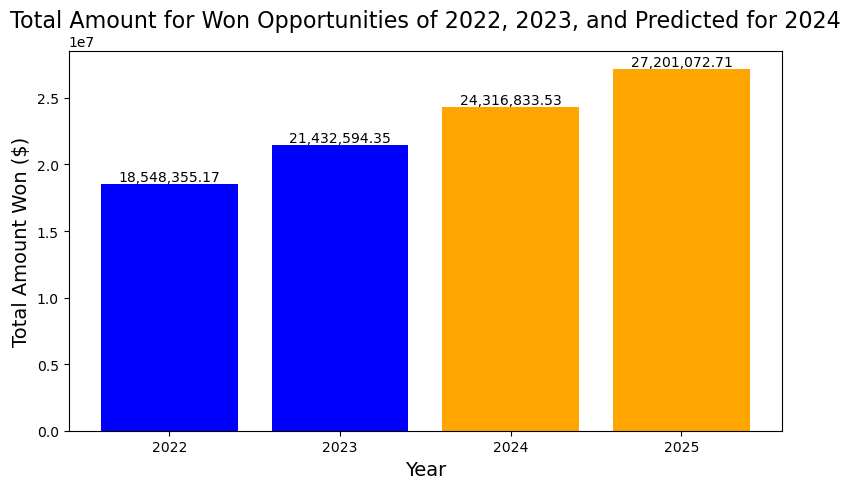

In [31]:

# Data for plotting using variables
years = ['2022', '2023', '2024','2025']
total_amounts = [
    total_amount_sum_won[2022],   # Total amount for 2022
    total_amount_sum_won[2023],   # Total amount for 2023
    predicted_total_amount,
    predicted_total_amount_2025 # Predicted total amount for 2024
]

# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(years, total_amounts, color=['blue', 'blue', 'orange','orange'])

# Adding title and labels
plt.title('Total Amount for Won Opportunities of 2022, 2023, and Predicted for 2024', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Amount Won ($)', fontsize=14)

# Adding data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.2f}', ha='center', va='bottom')

# Show the plot
#plt.grid(axis='y')
plt.tight_layout()
plt.show()


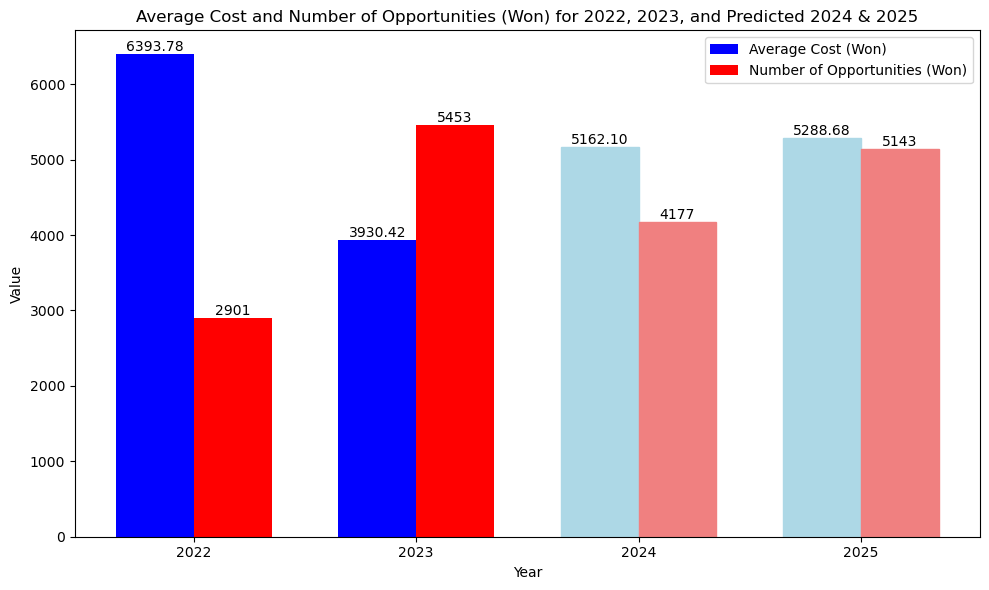

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the years
years = [2022, 2023, 2024, 2025]
average_costs = [
    df.loc[df['Year'] == 2022, 'Average Cost Won'].values[0],
    df.loc[df['Year'] == 2023, 'Average Cost Won'].values[0],
    average_cost_won_estimate,          # Estimated average cost for 2024
    average_predicted_total_amount       # Average predicted total amount for 2025
]

number_of_opportunities = [
    df.loc[df['Year'] == 2022, 'Number of Opportunities (Won)'].values[0],
    df.loc[df['Year'] == 2023, 'Number of Opportunities (Won)'].values[0],
    predicted_number_of_opportunities,    # Predicted number for 2024
    predicted_number_of_opportunities_2025 # Predicted number for 2025
]

# Create a bar width and position for the grouped bars
bar_width = 0.35
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar for Average Cost
bars1 = ax1.bar(r1, average_costs, color='blue', width=bar_width, label='Average Cost (Won)')
# Bar for Number of Opportunities
bars2 = ax1.bar(r2, number_of_opportunities, color='red', width=bar_width, label='Number of Opportunities (Won)')

# Highlight the predicted values for 2024 and 2025
bars1[2].set_color('lightblue')  # Change the color for predicted Average Cost for 2024
bars2[2].set_color('lightcoral')  # Change the color for predicted Number of Opportunities for 2024
bars1[3].set_color('lightblue')  # Change the color for predicted Average Cost for 2025
bars2[3].set_color('lightcoral')  # Change the color for predicted Number of Opportunities for 2025

# Labeling
ax1.set_xlabel('Year')
ax1.set_title('Average Cost and Number of Opportunities (Won) for 2022, 2023, and Predicted 2024 & 2025')
ax1.set_xticks([r + bar_width / 2 for r in range(len(years))])
ax1.set_xticklabels(years)
ax1.set_ylabel('Value')

# Adding legend
plt.legend()

# Displaying values on bars
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


In [33]:
import joblib

In [34]:
joblib.dump(model_total, 'model_total.pkl')
joblib.dump(model_count, 'model_count.pkl')
joblib.dump(model_total_extended, 'model_total_extended.pkl')
joblib.dump(model_count_extended, 'model_count_extended.pkl')


['model_count_extended.pkl']

In [35]:

# Load the models using their respective filenames
model_total_loaded = joblib.load('model_total.pkl')
model_count_loaded = joblib.load('model_count.pkl')
model_total_extended_loaded = joblib.load('model_total_extended.pkl')
model_count_extended_loaded = joblib.load('model_count_extended.pkl')